In [63]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

In [64]:
# read csv
df = pd.read_csv('naukri_jobs.csv')

In [65]:
# first rows
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [66]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [67]:
# rename all columns by a pattern
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [68]:
# check changes
df.columns

Index(['uniq_id', 'crawl_timestamp', 'job_title', 'job_salary',
       'job_experience_required', 'key_skills', 'role_category', 'location',
       'functional_area', 'industry', 'role'],
      dtype='object')

In [69]:
# delete columns
df.drop(['crawl_timestamp', 'job_title', 'uniq_id', 'role', 'industry'], axis=1, inplace=True)

In [70]:
# check null values
df.isnull().sum()

job_salary                   50
job_experience_required     573
key_skills                 1271
role_category              2305
location                    577
functional_area             573
dtype: int64

In [71]:
# where are them
df[df.isnull().any(axis=1)]

,job_salary,job_experience_required,key_skills,role_category,location,functional_area
15,Not Disclosed by Recruiter,0 - 1 yrs,instrumentation engineering| electrical engin...,NaN,Chennai,Other
31,Not Disclosed by Recruiter,3 - 5 yrs,NaN,NaN,Delhi,"Teaching , Education , Training , Counselling"
34,Not Disclosed by Recruiter,3 - 6 yrs,NaN,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte..."
41,"9,00,000 - 17,00,000 PA.",6 - 8 yrs,JMS| Core Java| Sonar| Weblogic| XML| J2Ee| S...,NaN,Pune,Other
53,"19,00,000 - 25,00,000 PA.",15 - 20 yrs,networking| information technology| network a...,NaN,Delhi NCR,Other
...,...,...,...,...,...,...
29918,NaN,Not Mentioned,NaN,NaN,Delhi,"Teaching , Education , Training , Counselling"
29942,Not disclosed,NaN,Leads|Senior|Lead|Senior|Lead|Lead|Lead|Senior...,NaN,NaN,NaN
29945,Not Disclosed by Recruiter,5 - 10 yrs,cook| Indian| cooks,NaN,Delhi NCR,Other
29971,"INR 1,75,000 - 2,75,000 PA.",NaN,Associates|Associate|Associates|Associate|Asso...,NaN,NaN,NaN


In [72]:
# drop null values
df.dropna(inplace=True)

# an alternative is fill null values by mean (if integers or floats)

In [73]:
# check changes
df.isnull().sum()

job_salary                 0
job_experience_required    0
key_skills                 0
role_category              0
location                   0
functional_area            0
dtype: int64

In [74]:
# duplicates
sum(df.duplicated())

351

In [75]:
# where are them
df[df.duplicated()]

,job_salary,job_experience_required,key_skills,role_category,location,functional_area
1025,Not Disclosed by Recruiter,0 - 3 yrs,Help Desk| Customer Service| data analysis| t...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op..."
1272,Not Disclosed by Recruiter,0 - 3 yrs,data analysis| Customer Service| Help Desk| I...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op..."
1973,Not Disclosed by Recruiter,0 - 3 yrs,Help Desk| Customer Service| data analysis| t...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op..."
2094,Not Disclosed by Recruiter,2 - 4 yrs,teaching| Counselor| Mentor| Trainer| Advisor,Teachers,Bengaluru,"Teaching , Education , Training , Counselling"
2126,Not Disclosed by Recruiter,10 - 12 yrs,Teaching| Educator| Counselor| Mentor| Traine...,University Level,Pune,"Teaching , Education , Training , Counselling"
...,...,...,...,...,...,...
29704,Not Disclosed by Recruiter,3 - 8 yrs,Help Desk| Customer Service| customer relatio...,Teachers,Chennai,"Teaching , Education , Training , Counselling"
29721,Not Disclosed by Recruiter,0 - 3 yrs,Sales Associate| Technical support| Issue| In...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op..."
29783,"2,25,000 - 4,50,000 PA.",0 - 4 yrs,bpo| tech support| it help desk| customer rel...,Voice,Bengaluru,"ITES , BPO , KPO , LPO , Customer Service , Op..."
29802,"1,50,000 - 6,50,000 PA.",0 - 5 yrs,international sales| expedia| bpo| internatio...,Voice,Bengaluru,"ITES , BPO , KPO , LPO , Customer Service , Op..."


In [76]:
# drop duplictes
df.drop_duplicates(inplace= True)

In [77]:
# check changes
df.shape

(26659, 6)

In [78]:
# uniques
df.nunique()

job_salary                  1039
job_experience_required      247
key_skills                 25292
role_category                205
location                    2428
functional_area               69
dtype: int64

In [79]:
# analyze 'job_salary' column 
df['job_salary'].value_counts()

# filter rows that starts with digit or INR  - rows that contain salary

 Not Disclosed by Recruiter            18069
 Not Disclosed by Recruiter              616
Openings: 1                              407
 2,00,000 - 3,00,000 PA.                 139
 2,00,000 - 4,00,000 PA.                 132
                                       ...  
 Salary Open. Open for Negotiation         1
 No bar for good candidate .               1
 INR 2,25,000 - 4,00,000 PA.               1
INR 18,00,000 - 20,00,000 PA.              1
 60,000 - 1,50,000 PA.                     1
Name: job_salary, Length: 1039, dtype: int64

In [80]:
# filter those that start with 'INR' and length is 27, 28 or 29
# first, strip
df['job_salary'] = df['job_salary'].str.strip()

In [81]:
# apply filter
df = df[(df['job_salary'].str.startswith('INR')) & (df['job_salary'].str.len() >= 27) & (df['job_salary'].str.len() < 30) | (df['job_salary'].str[0].str.isdigit())]

In [82]:
# extract only numbers from 'job_salary'
df['num'] = df['job_salary'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')

In [83]:
df.head()

,job_salary,job_experience_required,key_skills,role_category,location,functional_area,num
3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","[2, 00,000, 4, 00,000]"
5,"7,00,000 - 17,00,000 PA.",5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","[7, 00,000, 17, 00,000]"
6,"2,00,000 - 3,00,000 PA.",0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,Bengaluru,"Sales , Retail , Business Development","[2, 00,000, 3, 00,000]"
10,"25,00,000 - 35,00,000 PA.",5 - 10 yrs,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,"Strategy , Management Consulting , Corporate P...","[25, 00,000, 35, 00,000]"
14,"3,50,000 - 5,00,000 PA.",2 - 4 yrs,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,"Marketing , Advertising , MR , PR , Media Plan...","[3, 50,000, 5, 00,000]"


In [84]:
# col 'num' - fiter those that len == 4
df = df[df['num'].str.len() ==4]

In [85]:
# join numbers from num col
l_min = []
l_max = []
for row in df['num']:
    f = row[0]+row[1]
    s = row[2]+row[3]
    l_min.append(f)
    l_max.append(s)
    
df['min'] = l_min
df['max'] = l_max

In [86]:
# clean and transform to int
df['min'] = df['min'].str.replace(',', '').astype(int)
df['max'] = df['max'].str.replace(',', '').astype(int)

In [87]:
# calculate difference
df['salary_avg'] = df['max'] - df['min']

In [88]:
# drop min, max, job_salary, num
df.drop(['min', 'max', 'job_salary', 'num'], axis=1, inplace=True)

In [89]:
df.head()

,job_experience_required,key_skills,role_category,location,functional_area,salary_avg
3,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...",200000
5,5 - 7 yrs,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...",1000000
6,0 - 0 yrs,channel partners| real estate| negotiation| p...,Retail Sales,Bengaluru,"Sales , Retail , Business Development",100000
10,5 - 10 yrs,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,"Strategy , Management Consulting , Corporate P...",1000000
14,2 - 4 yrs,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,"Marketing , Advertising , MR , PR , Media Plan...",150000


In [90]:
# get avg of years from 'job_expereience_required' column
# extract only integers
df['num'] = df['job_experience_required'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')

In [91]:
# filter rows by length
df = df[df['num'].str.len() ==2]

In [92]:
# get min and max value
list_min = []
list_max = []
for row in df['num']:
    list_min.append(row[0])
    list_max.append(row[1])
df['min'] = list_min
df['max'] = list_max

In [93]:
# get min and max value
list_min = []
list_max = []
for row in df['num']:
    list_min.append(row[0])
    list_max.append(row[1])
df['min'] = list_min
df['max'] = list_max

In [94]:
# transform to int
df['min']=df['min'].astype(int)
df['max']=df['max'].astype(int)

In [95]:
# calculate avg
df['exp_lvl_avg'] = (df['max'] + df['min']) / 2

In [96]:
# filter avg_job_exp
df = df[df['exp_lvl_avg'] > 0]

In [97]:
# drop cols
df.drop(['min', 'max', 'num', 'job_experience_required'], axis=1, inplace=True)

In [98]:
df.head()

,key_skills,role_category,location,functional_area,salary_avg,exp_lvl_avg
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...",200000,2.5
5,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...",1000000,6.0
10,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,"Strategy , Management Consulting , Corporate P...",1000000,7.5
14,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,"Marketing , Advertising , MR , PR , Media Plan...",150000,3.0
20,sales manager| business development manager| ...,Retail/Personal Banking,"Bhilai/Bhillai,Bhilwara,Bhopal,Bhubaneshwar,Bi...","Financial Services , Banking , Investments , I...",225000,5.0


In [99]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [25000, 125000, 225000, 450000, 4000000] # min to max

# Labels for the four acidity level groups
bin_names = ['low', 'medium', 'high', 'very high'] # Name each acidity level category

df['salary_group'] = pd.cut(df['salary_avg'], bin_edges, labels=bin_names)

In [100]:
# Bin edges that will be used to "cut" the data into groups
bin_edge = [0.5, 2.5, 3.5, 6, 26] # min to max

# Labels for the four acidity level groups
bin_name = ['junior', 'middle', 'senior', 'manager+'] # Name each acidity level category

df['experience_group'] = pd.cut(df['exp_lvl_avg'], bin_edge, labels=bin_name)

In [101]:
df.head()

,key_skills,role_category,location,functional_area,salary_avg,exp_lvl_avg,salary_group,experience_group
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...",200000,2.5,medium,junior
5,adobe experience manager| digital| digital ma...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...",1000000,6.0,very high,senior
10,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,"Strategy , Management Consulting , Corporate P...",1000000,7.5,very high,manager+
14,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,"Marketing , Advertising , MR , PR , Media Plan...",150000,3.0,medium,middle
20,sales manager| business development manager| ...,Retail/Personal Banking,"Bhilai/Bhillai,Bhilwara,Bhopal,Bhubaneshwar,Bi...","Financial Services , Banking , Investments , I...",225000,5.0,medium,senior


In [102]:
# strip values from functional_area
df['functional_area'] = df['functional_area'].str.strip()

In [103]:
# filter functional_area by value_counts
m=df['functional_area'].value_counts() > 3
df = df[df['functional_area'].isin(m[m].index)]

In [104]:
# change to 'IT' if entry starts with 'IT'
df['functional_area'] = df['functional_area'].map(lambda s: 'IT' if s.startswith('IT ') else s)

In [105]:
# filter by value_count()
p = df['functional_area'].value_counts() > 4
df = df[df['functional_area'].isin(p[p].index)]

In [106]:
# exclude row start with 'other'
df = df[~df['functional_area'].str.startswith('Other')]

In [107]:
# replace values
df['functional_area'] = df['functional_area'].replace({'/':'', ",": ""}, regex=True)

In [108]:
# strip 
df['functional_area'] = df['functional_area'].str.split()

In [109]:
# get only two first values from functional_area
df['functional_area'] = df['functional_area'].str.slice(start=0, stop=2).apply(' & '.join)

In [110]:
df.head()

,key_skills,role_category,location,functional_area,salary_avg,exp_lvl_avg,salary_group,experience_group
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,IT,200000,2.5,medium,junior
5,adobe experience manager| digital| digital ma...,Programming & Design,Pune,IT,1000000,6.0,very high,senior
10,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,Strategy & Management,1000000,7.5,very high,manager+
14,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,Marketing & Advertising,150000,3.0,medium,middle
20,sales manager| business development manager| ...,Retail/Personal Banking,"Bhilai/Bhillai,Bhilwara,Bhopal,Bhubaneshwar,Bi...",Financial & Services,225000,5.0,medium,senior


In [111]:
# 'location' column - strip values
df['location'] = df['location'].str.strip()

In [112]:
# remove what is inside parenthesis
df['location']=df['location'].str.replace(r'\([^)]*\)', '', regex=True)

In [113]:
# split ds by ','
df['location']=df['location'].str.split(',')

In [114]:
# get first name
df['location']=df['location'].map(lambda x: x[0])

In [115]:
df.head()

,key_skills,role_category,location,functional_area,salary_avg,exp_lvl_avg,salary_group,experience_group
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,IT,200000,2.5,medium,junior
5,adobe experience manager| digital| digital ma...,Programming & Design,Pune,IT,1000000,6.0,very high,senior
10,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,Strategy & Management,1000000,7.5,very high,manager+
14,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,Marketing & Advertising,150000,3.0,medium,middle
20,sales manager| business development manager| ...,Retail/Personal Banking,Bhilai/Bhillai,Financial & Services,225000,5.0,medium,senior


In [116]:
df['location']=df['location'].str.split(' ')

In [117]:
df['location']=df['location'].map(lambda x: x[0])

In [118]:
df.head()

,key_skills,role_category,location,functional_area,salary_avg,exp_lvl_avg,salary_group,experience_group
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,IT,200000,2.5,medium,junior
5,adobe experience manager| digital| digital ma...,Programming & Design,Pune,IT,1000000,6.0,very high,senior
10,secretary| executive assistant| ea,Corporate Planning/Consulting/Strategy,Mumbai,Strategy & Management,1000000,7.5,very high,manager+
14,digital marketing| seo| social media marketin...,Online/Digital Marketing,Gurgaon,Marketing & Advertising,150000,3.0,medium,middle
20,sales manager| business development manager| ...,Retail/Personal Banking,Bhilai/Bhillai,Financial & Services,225000,5.0,medium,senior


In [119]:
# filter role_category
m = df['role_category'].value_counts() > 2
df = df[df['role_category'].isin(m[m].index)]

In [120]:
# get the first element
df["role_category"]=df["role_category"].str.split("/").str[0]

In [121]:
# save and export df
df.to_csv('salaries_60.csv')

In [122]:
# get median from salary
df['salary_avg'].median()

225000.0

In [123]:
# select samples with salary less than the median
low_salary = df.query('salary_avg < 225000')

# select samples with saalry greater than or equal to the median
high_salary = df.query('salary_avg >= 225000')

In [124]:
# get mean exp_lvl rating for the low salary and high salary groups
low_salary.exp_lvl_avg.mean(), high_salary['exp_lvl_avg'].mean()

(3.2360747051114025, 6.1031007751937985)

In [125]:
# an alternative
high = df['salary_avg']>=225000
low = df['salary_avg']<225000

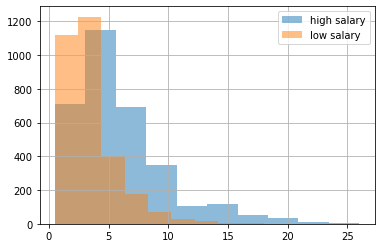

In [126]:
# ploting - salaray related with experience level
df.exp_lvl_avg[high].hist(alpha=0.5, label='high salary')
df.exp_lvl_avg[low].hist(alpha=0.5, label='low salary')
plt.legend()

In [127]:
# counting frequency of words from key_skills
# split words
df['key_skills']=df['key_skills'].str.split()

In [129]:
# apply counting
# Counter(elem for sub in df['key_skills'] for elem in sub).most_common()